# 0. Introduction
Welcome to the Risk-Parity Portfolio Analysis project! In this project, you'll explore the concept of risk-parity, a popular portfolio management strategy that aims to allocate investments in a way that equalizes the risk contribution of each asset. This approach is widely used by hedge funds and institutional investors to create more balanced portfolios that are less sensitive to market volatility.

Throughout this project, you'll learn how to download financial data for various assets, calculate returns, and compute risk-parity weights using Python. By the end, you'll evaluate the performance of your risk-parity portfolio through key financial metrics such as annualized return, volatility, and Sharpe ratio. This hands-on experience will deepen your understanding of portfolio management and give you practical skills in financial data analysis. Whether you're new to finance or looking to enhance your quantitative finance skills, this project provides a solid foundation in risk-parity strategies and their application in real-world scenarios.

## Getting Started: Tips and Instructions

1. **Familiarize Yourself with the Notebook Structure:**
   - The notebook is organized into clearly defined sections, each focusing on a specific aspect of the risk-parity portfolio analysis. Take a moment to glance through the sections to understand the overall workflow.

2. **Review the Data:**
   - Since the data is already available, start by exploring the initial few cells to understand the data structure and what each column represents. This will give you context for the calculations and analysis you'll be performing.

3. **Run Cells Sequentially:**
   - Work through the notebook by executing each code cell in order. This will help you build your analysis step by step and ensure that each part of the project is functioning as expected.

4. **Experiment with Parameters:**
   - Feel free to tweak parameters such as the rolling window size for calculating risk-parity weights or adjust the assets included in the portfolio. Experimenting will help deepen your understanding of how these factors influence portfolio performance.

5. **Leverage the Plots:**
   - Use the generated plots to visually assess the impact of your calculations. The visualizations are crucial for understanding the risk-parity approach and how different assets contribute to the portfolio.

6. **Reflect:**
   - As you work through the notebook, consider why each step is necessary and how it contributes to the overall goal of building a risk-parity portfolio. If something isn’t clear, take a moment to reflect or explore additional resources.

Enjoy the process of exploring risk-parity strategies, and don't hesitate to dive deeper into the data or code to enhance your learning experience!

# 1. Import Libraries

In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# 2. Download Financial Data
We will download front-month futures data for S&P500, 10-year Treasuries, gold, and US dollar using the `yfinance` library.

In [3]:
# Download front-month futures data
symbols = ['ES=F', 'ZN=F', 'GC=F', 'DX=F']
data = yf.download(symbols, auto_adjust=False)

[*********************100%***********************]  4 of 4 completed


In [4]:
data

Price        Adj Close                                         Close           \
Ticker            DX=F     ES=F         GC=F        ZN=F        DX=F     ES=F   
Date                                                                            
2000-06-22  107.400002      NaN          NaN         NaN  107.400002      NaN   
2000-06-23  107.720001      NaN          NaN         NaN  107.720001      NaN   
2000-06-26  107.769997      NaN          NaN         NaN  107.769997      NaN   
2000-06-27  106.980003      NaN          NaN         NaN  106.980003      NaN   
2000-06-28  107.250000      NaN          NaN         NaN  107.250000      NaN   
...                ...      ...          ...         ...         ...      ...   
2025-04-03  101.794998  5432.75  3097.000000  112.640625  101.794998  5432.75   
2025-04-04  102.767998  5110.25  3012.000000  113.046875  102.767998  5110.25   
2025-04-07  102.972000  5097.25  2951.300049  112.062500  102.972000  5097.25   
2025-04-08  102.700996  5020.25  2968.399902  111.468750  102.700996  5020.25   
2025-04-09  102.830002  5488.50  3110.199951  110.750000  102.830002  5488.50   

Price                                      High           ...          Low  \
Ticker             GC=F        ZN=F        DX=F     ES=F  ...         GC=F   
Date                                                      ...                
2000-06-22          NaN         NaN  107.639999      NaN  ...          NaN   
2000-06-23          NaN         NaN  107.879997      NaN  ...          NaN   
2000-06-26          NaN         NaN  108.260002      NaN  ...          NaN   
2000-06-27          NaN         NaN  107.849998      NaN  ...          NaN   
2000-06-28          NaN         NaN  107.599998      NaN  ...          NaN   
...                 ...         ...         ...      ...  ...          ...   
2025-04-03  3097.000000  112.640625  103.080002  5564.75  ...  3052.000000   
2025-04-04  3012.000000  113.046875  102.930000  5435.00  ...  3011.000000   
2025-04-07  2951.300049  112.062500  103.309998  5286.50  ...  2949.699951   
2025-04-08  2968.399902  111.468750  103.190002  5305.25  ...  2968.399902   
2025-04-09  3110.199951  110.750000  103.055000  5520.00  ...  2983.300049   

Price                         Open                                     Volume  \
Ticker            ZN=F        DX=F     ES=F         GC=F        ZN=F     DX=F   
Date                                                                            
2000-06-22         NaN  107.099998      NaN          NaN         NaN    666.0   
2000-06-23         NaN  107.430000      NaN          NaN         NaN    258.0   
2000-06-26         NaN  107.680000      NaN          NaN         NaN    266.0   
2000-06-27         NaN  107.849998      NaN          NaN         NaN    669.0   
2000-06-28         NaN  107.059998      NaN          NaN         NaN    258.0   
...                ...         ...      ...          ...         ...      ...   
2025-04-03  112.171875  102.879997  5550.50  3150.000000  112.187500  52574.0   
2025-04-04  112.718750  101.745003  5423.00  3110.500000  112.796875  56149.0   
2025-04-07  111.484375  102.754997  5007.00  3016.399902  113.578125  75545.0   
2025-04-08  111.250000  103.150002  5126.50  2994.000000  111.859375  75545.0   
2025-04-09  110.030998  102.540001  5006.25  2998.300049  111.375000  70269.0   

Price                                       
Ticker           ES=F      GC=F       ZN=F  
Date                                        
2000-06-22        NaN       NaN        NaN  
2000-06-23        NaN       NaN        NaN  
2000-06-26        NaN       NaN        NaN  
2000-06-27        NaN       NaN        NaN  
2000-06-28        NaN       NaN        NaN  
...               ...       ...        ...  
2025-04-03  2470412.0    5516.0  4419043.0  
2025-04-04  3678162.0    3247.0  5909934.0  
2025-04-07  3673583.0    4424.0  5938458.0  
2025-04-08  3673583.0    4424.0  5938458.0  
2025-04-09  2830339.0  284545.0  5073871.0  

[6276 

### 3. Resample Data

In this section, we aim to reduce the noise in the daily financial data by resampling it to a monthly frequency. Resampling is a common technique in time series analysis, allowing us to aggregate data points over a specified time period. This helps in smoothing out short-term fluctuations and making the data more manageable for analysis.


In [5]:
# Resample data to monthly frequency
#data = None # YOUR CODE HERE
# Convert index to datetime
#data.index = None # YOUR CODE HERE
data = data.reset_index()
data['Date'] = pd.to_datetime(data['Date'])     # Ensure datetime format
data.set_index('Date', inplace=True)          # Set Date as index
data = data.sort_index()                        # Make sure it's sorted (you said it is)

# Resample to monthly frequency, for example taking the last 'Close' in each month:
data = data.resample('ME').last()



In [6]:
print(type(data.index))
print(data)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Price        Adj Close                                         Close           \
Ticker            DX=F     ES=F         GC=F        ZN=F        DX=F     ES=F   
Date                                                                            
2000-06-30  106.580002      NaN          NaN         NaN  106.580002      NaN   
2000-07-31  109.370003      NaN          NaN         NaN  109.370003      NaN   
2000-08-31  112.570000      NaN   278.299988         NaN  112.570000      NaN   
2000-09-30  113.000000  1454.00   273.600006  100.218803  113.000000  1454.00   
2000-10-31  116.620003  1440.75   264.899994  100.703102  116.620003  1440.75   
...                ...      ...          ...         ...         ...      ...   
2024-12-31  108.295998  5935.75  2629.199951  108.750000  108.295998  5935.75   
2025-01-31  108.217003  6067.25  2812.500000  108.843750  108.217003  6067.25   
2025-02-28  107.557999  5963.25  2836.800049  111.06250

### 4. Clean and Prepare Data

In this step, we will focus on extracting the relevant data, handling missing values, and ensuring the data is ready for analysis. Specifically, we'll subset the adjusted close prices from our dataset, fill any missing values, and drop rows with unknown prices.

#### Steps to Clean and Prepare Data

1. **Subset Adjusted Close Prices**     
2. **Fill Missing Values (NaNs)**
3. **Drop Rows with Remaining NaNs**
4. **Ensure Correct Date Formatting**

By following these steps, we will have a clean dataset of adjusted close prices that is free of missing values and properly formatted for time series analysis.


In [7]:
#data.describe()
#data.info()
#print (prices)
#prices.index
# Subset adjusted close prices and fill NaNs
prices = data['Adj Close']

prices = prices.ffill()
prices = prices.dropna()
prices.isna().sum()

#prices
#prices = None # YOUR CODE HERE
# Convert index to datetime
#this was done previously
#prices.index = None # YOUR CODE HERE

Ticker
DX=F    0
ES=F    0
GC=F    0
ZN=F    0
dtype: int64

In [8]:
print(prices)

Ticker            DX=F     ES=F         GC=F        ZN=F
Date                                                    
2000-09-30  113.000000  1454.00   273.600006  100.218803
2000-10-31  116.620003  1440.75   264.899994  100.703102
2000-11-30  115.099998  1321.00   270.100006  102.703102
2000-12-31  109.279999  1327.00   272.000000  104.890602
2001-01-31  110.529999  1373.50   265.600006  105.484398
...                ...      ...          ...         ...
2024-12-31  108.295998  5935.75  2629.199951  108.750000
2025-01-31  108.217003  6067.25  2812.500000  108.843750
2025-02-28  107.557999  5963.25  2836.800049  111.062500
2025-03-31  103.883003  5653.25  3122.800049  111.218750
2025-04-30  102.830002  5488.50  3110.199951  110.750000

[296 rows x 4 columns]


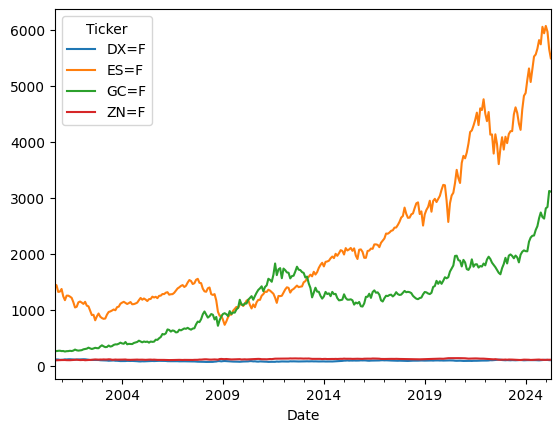

In [9]:
prices.plot()
plt.show()

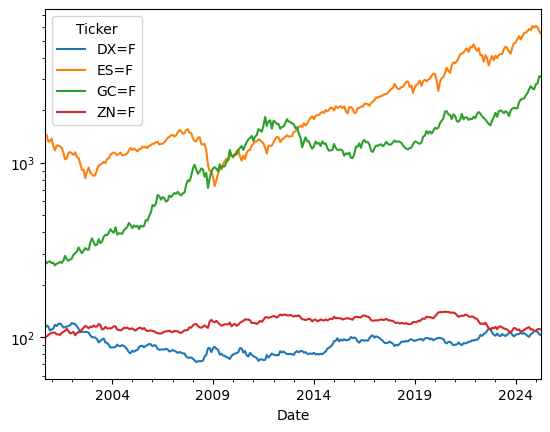

In [10]:
prices.plot()
plt.yscale("log")
plt.show()

### 5. Calculate Returns

In financial analysis, one of the key metrics is the return on an investment, which shows how much the price of an asset has increased or decreased over a certain period. We will calculate the **arithmetic returns** of the adjusted close prices to measure this change over time.

#### Steps to Calculate Arithmetic Returns

1. **Understanding Arithmetic Returns:**
   - Arithmetic returns measure the percentage change in the price of an asset from one period to the next. 
   - The formula for calculating the arithmetic return for a given period is:

     $
     R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
     $
     
     where:
     - $ R_t $ is the return at time $ t $,
     - $ P_t $ is the price at time $ t $,
     - $ P_{t-1} $ is the price at the previous time period.

   - This formula can be simplified to:
     $
     R_t = \frac{P_t}{P_{t-1}} - 1
     $
   - However, in practice, it is common to use the percentage change function provided by Pandas, which handles this calculation efficiently.

2. **Calculate Percentage Change**
3. **Handle Missing Values:**

By following these steps, we will have a series of arithmetic returns that represent the day-to-day percentage changes in the asset's price, which can be used for further analysis such as calculating cumulative returns, volatility, or risk metrics.


In [11]:
# Compute arithmetic returns
#prices.info()
returns = prices.pct_change().dropna() # YOUR CODE HERE

In [12]:
print(returns)

Ticker          DX=F      ES=F      GC=F      ZN=F
Date                                              
2000-10-31  0.032035 -0.009113 -0.031798  0.004832
2000-11-30 -0.013034 -0.083116  0.019630  0.019860
2000-12-31 -0.050565  0.004542  0.007034  0.021299
2001-01-31  0.011439  0.035041 -0.023529  0.005661
2001-02-28  0.013300 -0.095741  0.004518  0.008147
...              ...       ...       ...       ...
2024-12-31  0.023321 -0.019127 -0.010463 -0.020408
2025-01-31 -0.000729  0.022154  0.069717  0.000862
2025-02-28 -0.006090 -0.017141  0.008640  0.020385
2025-03-31 -0.034168 -0.051985  0.100818  0.001407
2025-04-30 -0.010136 -0.029143 -0.004035 -0.004215

[295 rows x 4 columns]


### 6. Compute Risk-Parity Weights

Risk-parity is an investment strategy that seeks to allocate portfolio weights in a way that each asset contributes equally to the overall portfolio risk. This method is especially useful in diversifying risk across different assets with varying levels of volatility.

#### Steps to Compute Risk-Parity Weights

1. **Understanding Risk-Parity:**
   - The idea behind risk-parity is to allocate more weight to less volatile assets and less weight to more volatile assets, thereby equalizing the risk contribution of each asset in the portfolio.
   - The weight of each asset in the portfolio is inversely proportional to its volatility.

2. **Calculate Rolling Volatility:**
   - Volatility is a statistical measure of the dispersion of returns for a given security or market index.
     
3. **Compute Inverse Volatility:**
4. **Normalize Weights:**
   - Once we have the inverse volatilities, we normalize them so that the sum of the weights for each time period equals 1. This ensures that we have a proper weight distribution across assets.
   - We achieve this by dividing the inverse volatility of each asset by the sum of the inverse volatilities across all assets for each time period.
     
5. **Shift Weights for Practical Application:**
   - In a real-world scenario, we can only make investment decisions based on information that is available at the time of making the decision. Therefore, we shift the computed weights by one period to ensure that the weights at time $ t $ are based on data up to $ t-1 $.      - This shift ensures that the weights applied are based on historical data up to the previous period, which is crucial for avoiding look-ahead bias.

By following these steps, we generate a time series of risk-parity weights that can be used to allocate assets in a way that balances the risk across the portfolio. The resulting weights adapt dynamically based on the rolling volatility, ensuring that each asset contributes equally to the overall risk over time.


In [13]:
def compute_risk_parity_weights(returns, window_size=36):
    # Compute volatility known at time t
    rolling_vol = returns.rolling(window=window_size).std()    
    rolling_inverse_vol = 1 / rolling_vol.replace(0, np.nan)
    # Divide inverse volatility by the sum of inverse volatilities
    risk_parity_weights = rolling_inverse_vol.div(rolling_inverse_vol.sum(axis=1), axis=0)
    # Shift weights by one period to use only information available at time t
    risk_parity_weights = risk_parity_weights.shift(1)

    return risk_parity_weights


risk_parity_weights = compute_risk_parity_weights(returns, 36)

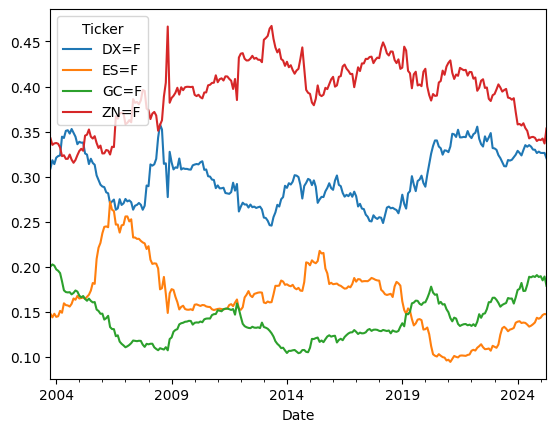

Ticker          DX=F      ES=F      GC=F      ZN=F
Date                                              
2000-10-31       NaN       NaN       NaN       NaN
2000-11-30       NaN       NaN       NaN       NaN
2000-12-31       NaN       NaN       NaN       NaN
2001-01-31       NaN       NaN       NaN       NaN
2001-02-28       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...
2024-12-31  0.327788  0.142375  0.188689  0.341147
2025-01-31  0.326361  0.143535  0.189570  0.340534
2025-02-28  0.326280  0.146487  0.184966  0.342267
2025-03-31  0.326346  0.147658  0.189217  0.336778
2025-04-30  0.320441  0.147208  0.178951  0.353400

[295 rows x 4 columns]


In [14]:
risk_parity_weights.dropna().plot()
plt.show()

print(risk_parity_weights)

### 7. Calculate Weighted Returns

Once we have determined the risk-parity weights, the next step is to calculate the weighted returns for each asset and then aggregate them to obtain the portfolio returns. This process allows us to understand how the risk-parity allocation strategy would have performed over time.

#### Steps to Calculate Weighted Returns

1. **Understanding Weighted Returns:**
   - The weighted return of an asset is calculated by multiplying its individual return by the corresponding weight in the portfolio. 
   - The total portfolio return at any given time is the sum of the weighted returns of all assets.

2. **Apply Weights to Returns:**
   - We will multiply the returns of each asset by its corresponding risk-parity weight for each time period. This will give us the weighted return for each asset.
3. **Handle Missing Data:**
   - We drop any rows with missing values (`NaN`) that may result from the multiplication process. This ensures that we only consider time periods with complete data.
4. **Aggregate Weighted Returns:**
   - To calculate the portfolio's return at each time period, sum the weighted returns across all assets. This gives the overall return of the portfolio for each time period.

#### Mathematical Representation:

Given the returns $ r_{i,t} $ for asset $ i $ at time $ t $, and the risk-parity weight $ w_{i,t} $ for asset $ i $ at time $ t $, the weighted return for asset $ i $ at time $ t $ is:

$ r_{i,t}^{weighted} = r_{i,t} \times w_{i,t} $

The total portfolio return at time $ t $ is the sum of the weighted returns for all assets:

$
R_{portfolio,t} = \sum_{i=1}^{n} r_{i,t}^{weighted}
$

Where $ n $ is the number of assets in the portfolio.

By following these steps, we obtain the portfolio returns that reflect the performance of the risk-parity strategy over time. This provides insights into how well the strategy balanced risk across different market conditions.


In [15]:
# Calculate weighted returns
weighted_returns = risk_parity_weights*returns  # YOUR CODE HERE
risk_parity_portfolio_returns = weighted_returns.sum(axis=1) # YOUR CODE HERE

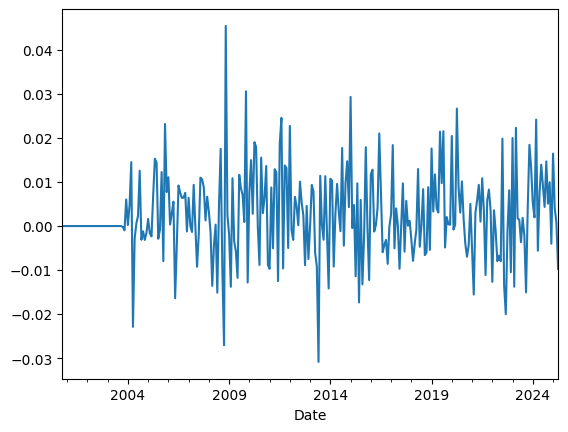

In [16]:
#print(risk_parity_portfolio_returns)
risk_parity_portfolio_returns.dropna().plot()
plt.show()

#

### 8. Evaluate Portfolio Performance

To assess the performance of the risk-parity portfolio, we will compute several key financial metrics. These metrics will help us understand the portfolio's return, risk, and overall performance characteristics. Below are the details of the metrics we will calculate, along with the functions used and their corresponding arguments.

1. **Annualized Mean Return**
   - **Description:** The average return of the portfolio on an annual basis. This is useful for understanding the long-term growth rate of the portfolio.
2. **Annualized Volatility**
   - **Description:** A measure of the portfolio's return volatility on an annual basis, indicating the degree of variation in returns.
   - **Formula:** 
     $
     \text{Annualized Volatility} = \text{Standard Deviation of Monthly Returns} \times \sqrt{12}
     $
3. **Skewness**
   - **Description:** Skewness measures the asymmetry of the return distribution. Positive skewness indicates a distribution with a longer right tail, while negative skewness indicates a longer left tail.
4. **Kurtosis**
   - **Description:** Kurtosis measures the "tailedness" of the return distribution. High kurtosis indicates a distribution with heavy tails and a sharp peak.
5. **Maximum Drawdown**
   - **Description:** The maximum observed loss from a peak to a trough of the portfolio's cumulative returns, before a new peak is attained.
   - **Formula:** 
     $
     \text{Drawdown} = \frac{\text{Cumulative Return} - \text{Running Maximum}}{\text{Running Maximum}}
     $
6. **Sharpe Ratio**
   - **Description:** The Sharpe Ratio measures the risk-adjusted return of the portfolio, calculated as the ratio of the portfolio's excess return (over the risk-free rate, typically assumed to be 0 in this case) to its volatility.
   - **Formula:** 
     $
     \text{Sharpe Ratio} = \frac{\text{Annualized Mean Return}}{\text{Annualized Volatility}}
     $
7. **Sortino Ratio**
   - **Description:** The Sortino Ratio is a variation of the Sharpe Ratio that penalizes only downside volatility, thus providing a better measure of risk-adjusted return for portfolios that have asymmetric return distributions.
   - **Formula:** 
     $
     \text{Sortino Ratio} = \frac{\text{Annualized Mean Return}}{\text{Downside Volatility}}
     $
8. **Calmar Ratio**
   - **Description:** The Calmar Ratio measures the risk-adjusted return of a portfolio by comparing the annualized return to the maximum drawdown, providing insight into performance relative to the worst-case scenario.
   - **Formula:** 
     $
     \text{Calmar Ratio} = \frac{\text{Annualized Mean Return}}{-\text{Maximum Drawdown}}
     $

After calculating these metrics, we will display the results to evaluate the performance of the risk-parity portfolio comprehensively.


In [17]:
# Evaluate portfolio performance
#risk_parity_portfolio_returns
#annual_mean_return = None # YOUR CODE HERE
#annual_volatility = None # YOUR CODE HERE
#skewness = None # YOUR CODE HERE
#kurtosis = None # YOUR CODE HERE

annual_mean_return = risk_parity_portfolio_returns.mean() * 12
annual_volatility = risk_parity_portfolio_returns.std() * np.sqrt(12)
skewness = risk_parity_portfolio_returns.skew()
kurtosis = risk_parity_portfolio_returns.kurt()


# Compute drawdown
cumulative_returns = (1 + risk_parity_portfolio_returns).cumprod()
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) / running_max
max_drawdown = drawdown.min()


# Compute Sharpe ratio
sharpe_ratio = annual_mean_return / annual_volatility

# Compute Sortino ratio
downside_returns = risk_parity_portfolio_returns[risk_parity_portfolio_returns < 0]
downside_std = downside_returns.std() * np.sqrt(12)
sortino_ratio = annual_mean_return / downside_std



# Compute Calmar ratio
calmar_ratio = annual_mean_return / abs(max_drawdown)

# Display results
print(f"Mean Annual Return: {annual_mean_return:.4f}")
print(f"Annual Volatility: {annual_volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Calmar Ratio: {calmar_ratio:.4f}")

Mean Annual Return: 0.0292
Annual Volatility: 0.0337
Skewness: 0.3333
Kurtosis: 1.5886
Maximum Drawdown: -0.0496
Sharpe Ratio: 0.8664
Sortino Ratio: 1.4223
Calmar Ratio: 0.5892


### 9. Plot Results

Visualizing the performance of the risk-parity portfolio is crucial for understanding the dynamics of cumulative returns and drawdowns over time. We will create a plot that displays both the cumulative returns and the drawdowns on the same graph. This will allow us to see how the portfolio grows over time and the extent of losses from peak to trough.

#### Steps to Plot the Results:

1. **Initialize the Plot**:
   - We use `plt.subplots()` to create a figure and an axis object, allowing us to customize the plot.
   - The `figsize` argument specifies the size of the plot. In this case, we choose a wide format (`14x7`) to better display the time series data.
   - Example:
     ```python
     fig, ax = plt.subplots(figsize=(14, 7))
     ```

2. **Plot Cumulative Returns**:
   - The `plot()` function is used to plot the cumulative returns on the axis `ax`.
   - The `label` argument is used to create a legend entry, and `color` specifies the color of the line.
   - Example:
     ```python
     cumulative_returns.plot(ax=ax, label='Cumulative Returns', color='blue')
     ```

3. **Plot Drawdown**:
   - Similarly, the `plot()` function is used to plot the drawdown on the same axis `ax`.
   - The `label` and `color` arguments distinguish this line from the cumulative returns.
   - Example:
     ```python
     drawdown.plot(ax=ax, label='Drawdown', color='red')
     ```

4. **Customize the Plot**:
   - The `set_title()` function sets the title of the plot, making it clear what the graph represents.
   - The `set_ylabel()` and `set_xlabel()` functions label the y-axis and x-axis, respectively, to indicate what the axes represent (e.g., 'Cumulative Returns' and 'Date').
   - Example:
     ```python
     ax.set_title('Cumulative Returns and Drawdown')
     ax.set_ylabel('Cumulative Returns')
     ax.set_xlabel('Date')
     ```

5. **Add a Legend**:
   - The `legend()` function adds a legend to the plot, helping to identify which line represents cumulative returns and which represents drawdown.
   - Example:
     ```python
     ax.legend()
     ```

6. **Display the Plot**:
   - Finally, `plt.show()` is called to display the plot.
   - Example:
     ```python
     plt.show()
     ```

The resulting plot will provide a clear visual representation of how the portfolio's value has evolved over time and the magnitude of any losses (drawdowns) experienced during the period. This visualization is essential for analyzing the risk and return profile of the portfolio.


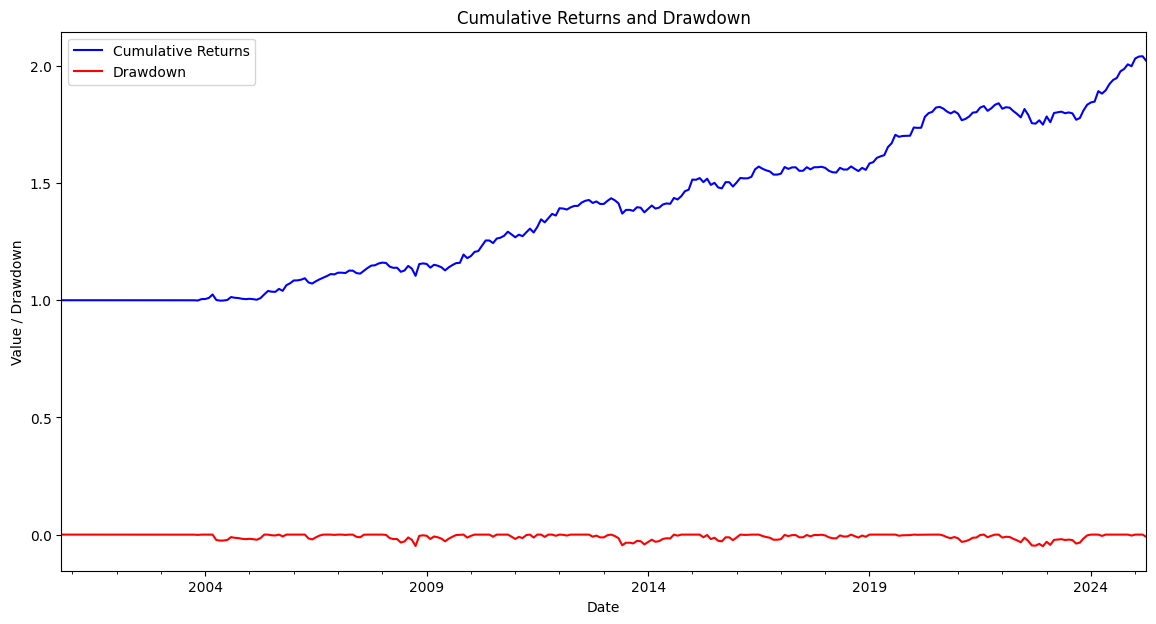

In [18]:
# Plot portfolio performance

fig, ax = plt.subplots(figsize=(14, 7))

# Plot cumulative returns
cumulative_returns.plot(ax=ax, label='Cumulative Returns', color='blue')

# Plot drawdown (on same axis for shared timeline)
drawdown.plot(ax=ax, label='Drawdown', color='red')

# Customize plot
ax.set_title('Cumulative Returns and Drawdown')
ax.set_ylabel('Value / Drawdown')
ax.set_xlabel('Date')
ax.legend()

# Display
plt.show()



Analysis for the following portfolio
['COHR', 'SNPS']
Mean Annual Return: 0.2007
Annual Volatility: 0.2916
Skewness: 0.3290
Kurtosis: 1.0004
Maximum Drawdown: -0.5128
Sharpe Ratio: 0.6883
Sortino Ratio: 1.1628
Calmar Ratio: 0.3914


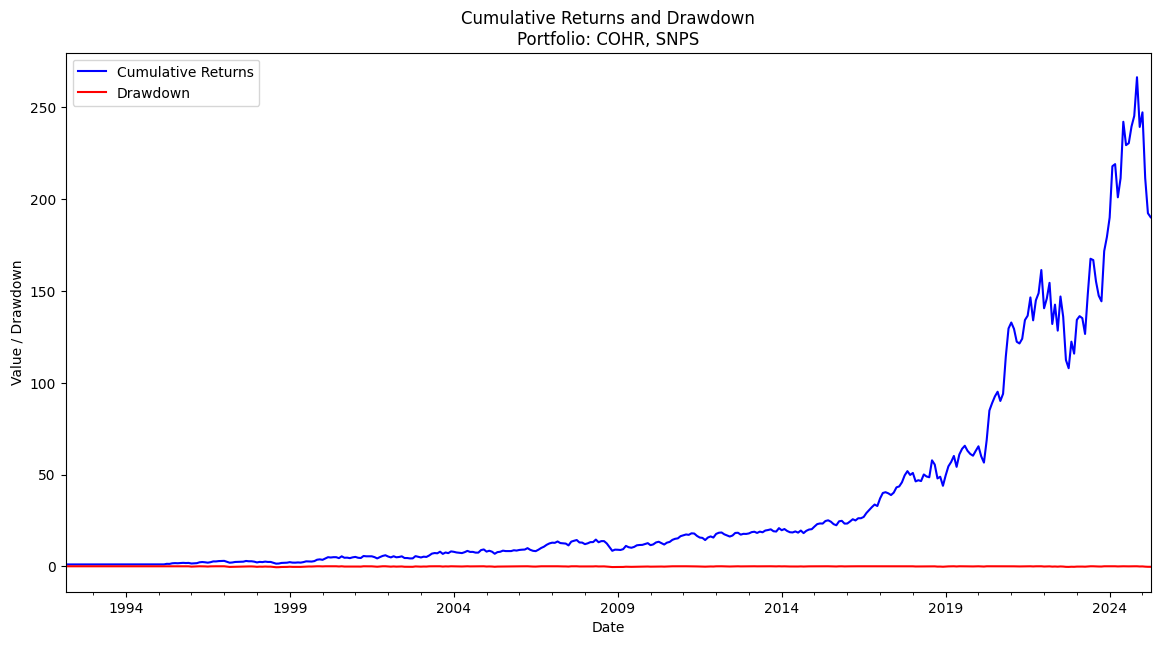

In [22]:
#Additional work to make the project stand out! :-)

#I decided to package everything above into different functions
#The idea is to have a call that taking only a list of tickers
#will perform the full report.

def get_monthly_prices(tickers):
    # Download data
    print ('Analysis for the following portfolio')
    print (tickers)
    data = yf.download(tickers, auto_adjust=False, progress=False)

    # Reset index and convert to datetime
    data = data.reset_index()
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    data = data.sort_index()

    # Resample to month-end frequency
    data = data.resample('ME').last()

    # Extract adjusted close prices
    prices = data['Adj Close']

    # Fill missing values and drop remaining NaNs
    prices = prices.ffill().dropna()

    return prices

def compute_risk_parity_weightsReport(prices, window_size=36):
    returns = prices.pct_change().dropna() # YOUR CODE HERE
    # Compute volatility known at time t
    rolling_vol = returns.rolling(window=window_size).std()    
    rolling_inverse_vol = 1 / rolling_vol.replace(0, np.nan)
    # Divide inverse volatility by the sum of inverse volatilities
    risk_parity_weights = rolling_inverse_vol.div(rolling_inverse_vol.sum(axis=1), axis=0)
    # Shift weights by one period to use only information available at time t
    risk_parity_weights = risk_parity_weights.shift(1)

    return returns, risk_parity_weights


def performance_report(returns, risk_parity_weights):

    weighted_returns = risk_parity_weights*returns  # YOUR CODE HERE
    risk_parity_portfolio_returns = weighted_returns.sum(axis=1) # YOUR CODE HERE
    annual_mean_return = risk_parity_portfolio_returns.mean() * 12
    annual_volatility = risk_parity_portfolio_returns.std() * np.sqrt(12)
    skewness = risk_parity_portfolio_returns.skew()
    kurtosis = risk_parity_portfolio_returns.kurt()


    # Compute drawdown
    cumulative_returns = (1 + risk_parity_portfolio_returns).cumprod()
    running_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - running_max) / running_max
    max_drawdown = drawdown.min()


    # Compute Sharpe ratio
    sharpe_ratio = annual_mean_return / annual_volatility

    # Compute Sortino ratio
    downside_returns = risk_parity_portfolio_returns[risk_parity_portfolio_returns < 0]
    downside_std = downside_returns.std() * np.sqrt(12)
    sortino_ratio = annual_mean_return / downside_std



    # Compute Calmar ratio
    calmar_ratio = annual_mean_return / abs(max_drawdown)

    # Display results
    print(f"Mean Annual Return: {annual_mean_return:.4f}")
    print(f"Annual Volatility: {annual_volatility:.4f}")
    print(f"Skewness: {skewness:.4f}")
    print(f"Kurtosis: {kurtosis:.4f}")
    print(f"Maximum Drawdown: {max_drawdown:.4f}")
    print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
    print(f"Sortino Ratio: {sortino_ratio:.4f}")
    print(f"Calmar Ratio: {calmar_ratio:.4f}")

    return cumulative_returns, drawdown

def plot_returns(cumulative_returns, drawdown, tickers):
    # Plot portfolio performance

    fig, ax = plt.subplots(figsize=(14, 7))

    # Plot cumulative returns
    cumulative_returns.plot(ax=ax, label='Cumulative Returns', color='blue')

    # Plot drawdown (on same axis for shared timeline)
    drawdown.plot(ax=ax, label='Drawdown', color='red')

    # Customize plot
    ax.set_title(f"Cumulative Returns and Drawdown\nPortfolio: {', '.join(tickers)}")
    ax.set_ylabel('Value / Drawdown')   
    ax.set_xlabel('Date')
    ax.legend()

    # Display
    plt.show()




def wrapper(tickers):
    t_prices = get_monthly_prices(tickers)
    rr,wgts = compute_risk_parity_weightsReport(t_prices, window_size=36)
    cumret, drawd = performance_report(rr, wgts)
    plot_returns(cumret, drawd, tickers)
#print (rr)

tickers = ['COHR', 'SNPS']
wrapper(tickers)


#plot_returns(cumret, drawd)
